# Context

In this notebook we will do some exploratory data analysis for the variable "monto"

# Load packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import random
import os


pd.options.display.max_columns = 100
pd.options.display.max_rows = 100


# Load data

using relative paths

In [2]:
filename = "EDA_monto.ipynb" # Current file name
print(f'Current file name: {filename}\n')
print(f'Current absolute path: {os.getcwd()}')

# Specify the paths, relative to the current file
NOTEBOOKS_DIR = os.path.dirname(os.path.abspath(filename))
BASE_DIR = os.path.dirname(NOTEBOOKS_DIR)
DATA_DIR = os.path.join(BASE_DIR, "Data")
OUTPUT_DIR = os.path.join(DATA_DIR, "output_data")

print(f'BASE_DIR: {BASE_DIR}')
print(f'DATA_DIR: {DATA_DIR}')
print(f'OUTPUT_DIR: {OUTPUT_DIR}')

Current file name: EDA_monto.ipynb

Current absolute path: c:\Users\jhona\Dropbox\ASPECTOS MAESTRIA\Retos_maestria\Reto_bancow\Analitica_1\notebooks
BASE_DIR: c:\Users\jhona\Dropbox\ASPECTOS MAESTRIA\Retos_maestria\Reto_bancow\Analitica_1
DATA_DIR: c:\Users\jhona\Dropbox\ASPECTOS MAESTRIA\Retos_maestria\Reto_bancow\Analitica_1\Data
OUTPUT_DIR: c:\Users\jhona\Dropbox\ASPECTOS MAESTRIA\Retos_maestria\Reto_bancow\Analitica_1\Data\output_data


In [3]:
df_clean = pd.read_excel(os.path.join(OUTPUT_DIR,"hallazgos_clean.xlsx" )).iloc[:,1:]
df_clean.head(2)

,cliente,analista,tipo_credito,actividad,actividad_v2,monto,cuota,plazo,fecha_desembolso,visita_analista_credito,categoria,hallazgo,tipo_hallazgo,riesgo,calificacion_cartera,relaciones_laborales,oficina,zona,regional,estado,year,tipo
0,Hector Julio Pabon Castano,AIZ,Renovacion,don_patacon_postobon,otros,15069268,792642,36,2021-06-11,NaT,fraude_y_practicas_indebidas,credito otorgado a mas de un titular con el mi...,acto irregular,1 - Alto,Si,Si,dosquebradas,12,4,cancelada,2022,afecta estabilidad
1,Casas Marisol ...,JQQ,Renovacion,expendio_de_comidas_preparadas_en_cafeterias,sector_alimenticio,402000,209228,626,2021-06-15,2021-06-08,fraude_y_practicas_indebidas,presunto negocio inexistente,acto irregular,1 - Alto,No,Si,poblado,1,1,castigo,2022,afecta estabilidad


# Univariate analysis - monto

Next, we will do some data explorations to the monto variable, in order to gather valuable information that allow us to focus better the goal or solution.

In [4]:
print(f'Number of observations: {df_clean.shape[0]}')
print(f'Number of NA values: {df_clean.monto.isna().sum()}')

Number of observations: 3414
Number of NA values: 0


## Distribution

First, lets check the general distribution of the variable monto

In [5]:
print("¡lets calculate some important metrics!\n")
print("\n--Central tendency:")
print(f'Mean: ${round(df_clean.monto.mean(),1):,}')
print(f'Median: ${round(df_clean.monto.quantile(0.5),1):,}')
print(f'Mode: ${round(df_clean.monto.mode()[0],1):,}')
print(f'Min: ${round(df_clean.monto.min(),1):,}')
print(f'Max: ${round(df_clean.monto.max(),1):,}')

print("\n--Measures of dispersion:")
print(f'standard deviation: ${round(df_clean.monto.std(),1):,}')
print(f'Variation coefficient: {round(df_clean['monto'].std() / df_clean['monto'].mean() * 100,1)} ')
print(f'Range: ${round(df_clean['monto'].max() - df_clean['monto'].min(),1):,} ')
print(f'IQR: ${round(df_clean['monto'].quantile(0.75) - df_clean['monto'].quantile(0.25),1):,} ')

print("\n--Measures of distribution shape:")
print(f'Skewness: {round(df_clean['monto'].skew(),1)} ')
print(f'Kurtosis: {round(df_clean['monto'].kurtosis(),1)}')

print("\n--Some percentiles:")
percentiles = [0.1, 0.25, 0.5, 0.75, 0.9]
values= df_clean['monto'].quantile(percentiles).to_list()
print([f"P{int(p*100)}: ${int(v):,}" for p, v in zip(percentiles, values)])

¡lets calculate some important metrics!


--Central tendency:
Mean: $7,931,928.0
Median: $3,736,415.0
Mode: $400,000
Min: $400,000
Max: $130,000,000

--Measures of dispersion:
standard deviation: $12,339,723.4
Variation coefficient: 155.6 
Range: $129,600,000 
IQR: $5,401,416.0 

--Measures of distribution shape:
Skewness: 3.9 
Kurtosis: 20.7

--Some percentiles:
['P10: $1,132,013', 'P25: $1,852,791', 'P50: $3,736,415', 'P75: $7,254,207', 'P90: $19,691,704']


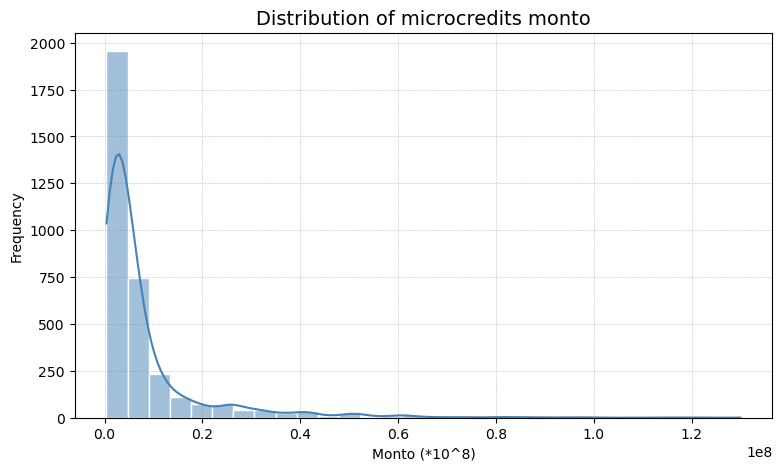

In [6]:
# histogram
plt.figure(figsize=(9, 5))
sns.histplot(x=df_clean.monto, edgecolor="white", color="steelblue", linewidth=1, bins=30, kde=True)
plt.title('Distribution of microcredits monto', fontsize=14)
plt.xlabel("Monto (*10^8)")
plt.ylabel("Frequency")
plt.grid(color='gray', linestyle='--', linewidth=0.4, alpha=0.5)
plt.show()

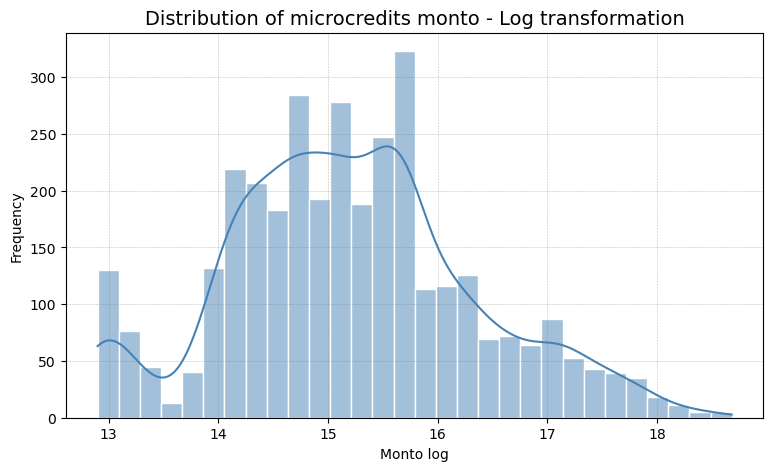

In [27]:
# histogram with logarithmic transformation
plt.figure(figsize=(9, 5))
sns.histplot(x=np.log(df_clean.monto), edgecolor="white", color="steelblue", linewidth=1, bins=30, kde=True)
plt.title('Distribution of microcredits monto - Log transformation', fontsize=14)
plt.xlabel("Monto log")
plt.ylabel("Frequency")
plt.grid(color='gray', linestyle='--', linewidth=0.4, alpha=0.5)
plt.show()

## Check outliers

In [ ]:
print("Lets calculate some outliers metrics:\n")

# Q1, Q3 & IQR
Q1 = np.percentile(df_clean.monto, 25)  # Q1 (25%)
Q3 = np.percentile(df_clean.monto, 75)  # Q3 (75%)
IQR = Q3 - Q1  # IQR

# Limits for outliers
lower_limit = Q1 - 1.5 * IQR 
lower_limit = 0 if lower_limit<0 else lower_limit
upper_limit = Q3 + 1.5 * IQR

# Identify outlier
outliers = df_clean.monto[(df_clean.monto < lower_limit) | (df_clean.monto > upper_limit)]
upper_outliers = df_clean[(df_clean.monto > upper_limit)]

print(f'Outliers upper limit: ${upper_limit:,}')
print(f'Outliers lower limit: ${lower_limit:,}')

print(f'Number of microcredits consider as outliers: {upper_outliers.shape[0]}')
print(f'% of outliers of the total observations: {round(upper_outliers.shape[0]/df_clean.shape[0]*100,2)}%')


Lets calculate some outliers metrics:

Outliers upper limit: $15,356,331.5
Outliers lower limit: $0
Number of microcredits consider as outliers: 447
% of outliers of the total observations: 13.09%


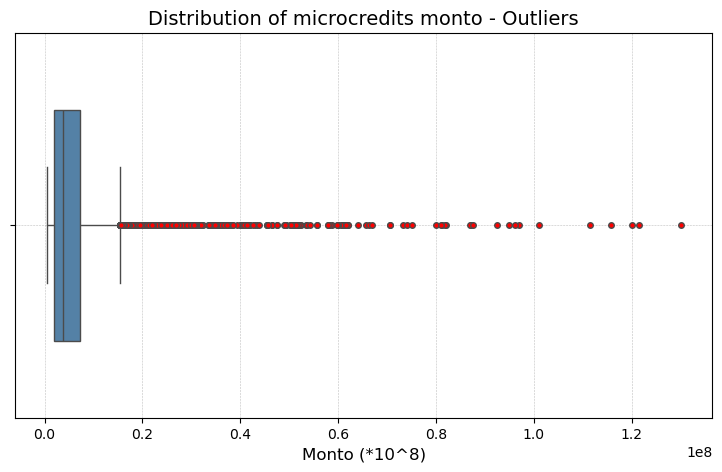

In [ ]:
# Boxplot

plt.figure(figsize=(9, 5))
sns.boxplot(x=df_clean['monto'], color="steelblue", linewidth=1, width=0.6, 
            flierprops=dict(marker='o', markerfacecolor='red', markersize=4))

plt.title("Distribution of microcredits monto - Outliers", fontsize=14)
plt.xlabel("Monto (*10^8)", fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.4, alpha=0.5)

plt.show()

## Check patterns

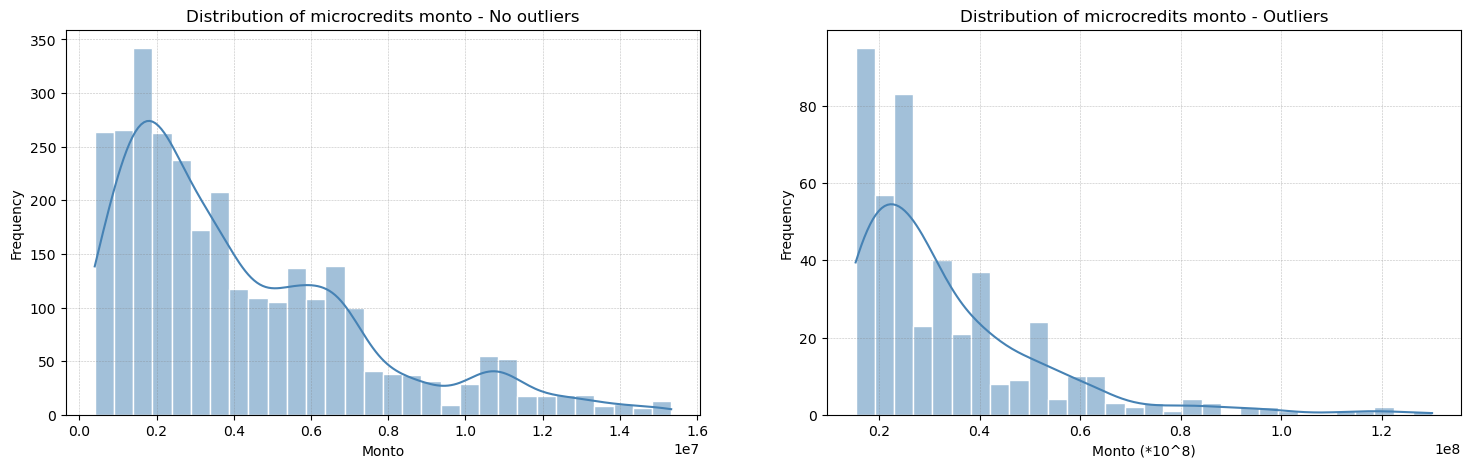

In [ ]:
# lets check the distribution of monto spliting the outliers observations

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.histplot(x = df_clean[df_clean.monto<upper_limit].monto, edgecolor="white", color="steelblue", linewidth=1, bins=30, kde=True)
plt.title("Distribution of microcredits monto - No outliers")
plt.xlabel("Monto")
plt.ylabel("Frequency")
plt.grid(color='gray', linestyle='--', linewidth=0.4, alpha=0.5)

plt.subplot(1,2,2)
sns.histplot(x = upper_outliers.monto, edgecolor="white", color="steelblue", linewidth=1, bins=30, kde=True)
plt.title("Distribution of microcredits monto - Outliers")
plt.xlabel("Monto (*10^8)")
plt.ylabel("Frequency")
plt.grid(color='gray', linestyle='--', linewidth=0.4, alpha=0.5)


plt.show()


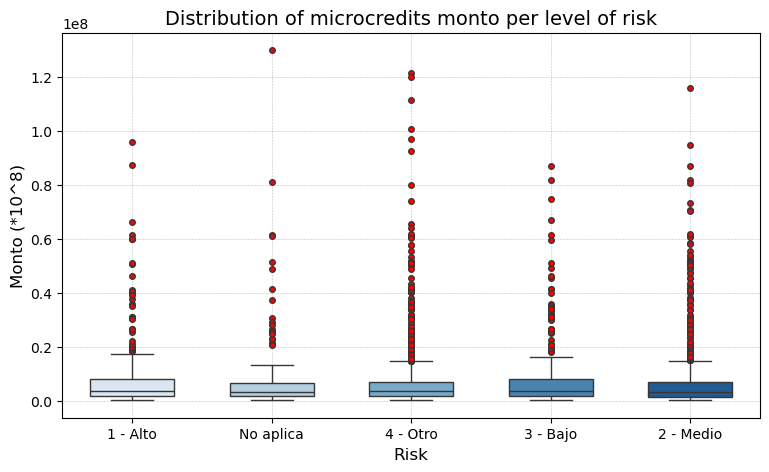

In [25]:
# Boxplot - monto per risk

plt.figure(figsize=(9, 5))
sns.boxplot(x=df_clean['riesgo'], y=df_clean['monto'], palette="Blues", linewidth=1, width=0.6,hue=df_clean['riesgo'],
            flierprops=dict(marker='o', markerfacecolor='red', markersize=4))


plt.title("Distribution of microcredits monto per level of risk", fontsize=14)
plt.xlabel("Risk", fontsize=12)
plt.ylabel("Monto (*10^8)", fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.4, alpha=0.5)


plt.show()

In [ ]:
# Lets check the monto per riesgo level

df.groupby(by="Año").agg(
    {
        "Monto": [
            ("#","count"),
            ("min","min"),
            ("Q 10",lambda x: round(x.quantile(q=0.1),3)),
            ("Promedio", "mean"),
            ("Q 90",lambda x: round(x.quantile(q=0.9),3)),
            ("max","max")
        ]
    }
)

# Interpretation and results